In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("airline-passengers.csv", parse_dates=['Month'], index_col='Month')
df.rename(columns={'Passengers': 'Passengers'}, inplace=True)

# Display first few rows
print("Data Head:\n", df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'airline-passengers.csv'

In [2]:
!wget -q https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv("airline-passengers.csv", parse_dates=['Month'], index_col='Month')
df.rename(columns={'Passengers': 'Passengers'}, inplace=True)

# Display first few rows
print("Data Head:\n", df.head())

Data Head:
             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


In [4]:
# Resample to quarterly mean (optional)
quarterly = df.resample('Q').mean()
print(quarterly.head())


            Passengers
Month                 
1949-03-31  120.666667
1949-06-30  128.333333
1949-09-30  144.000000
1949-12-31  113.666667
1950-03-31  127.333333


/tmp/ipython-input-4-2092225209.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').mean()


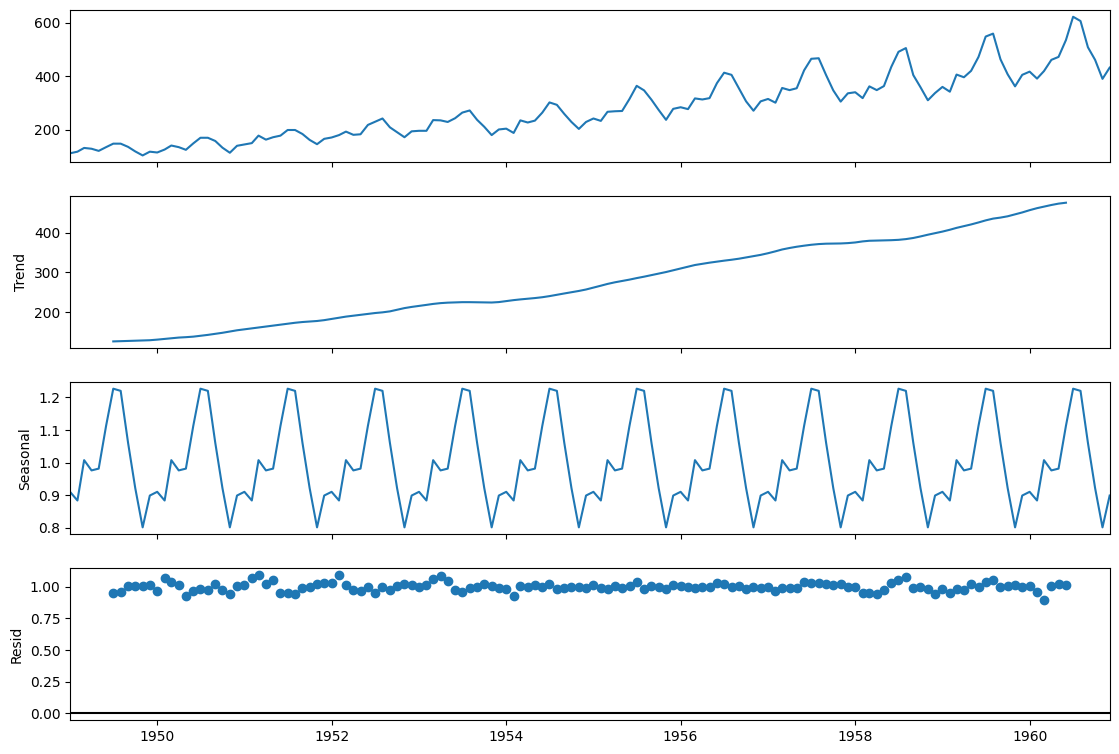

In [5]:
# Decompose time series
decomposition = seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


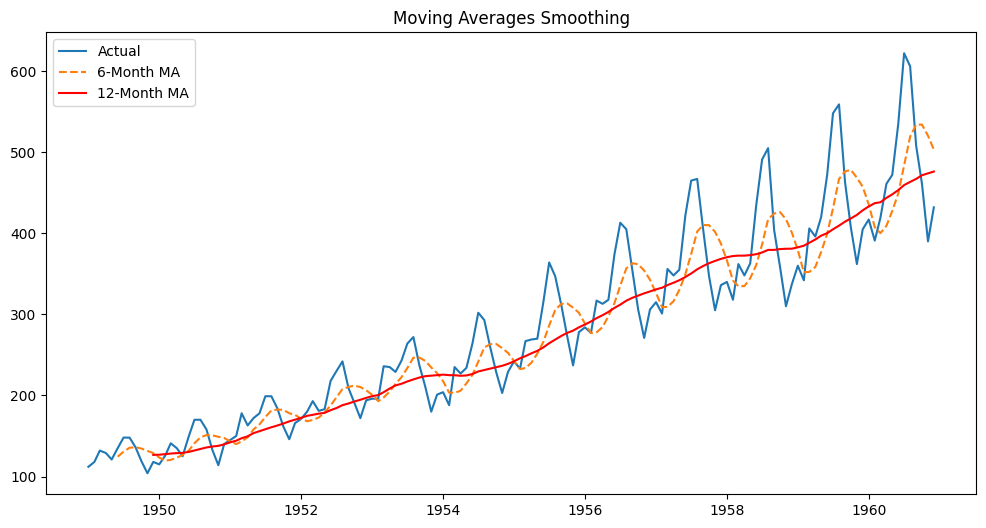

In [6]:
# Calculate 6-month and 12-month moving averages
df['MA_6'] = df['Passengers'].rolling(window=6).mean()
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Actual')
plt.plot(df['MA_6'], label='6-Month MA', linestyle='--')
plt.plot(df['MA_12'], label='12-Month MA', color='red')
plt.title('Moving Averages Smoothing')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

RMSE: 21.2 passengers


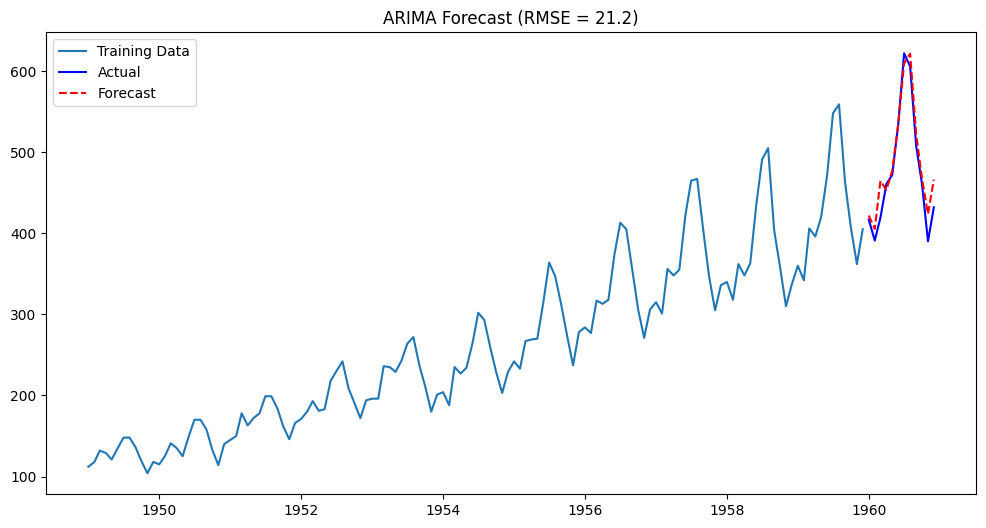

In [10]:
# Train-test split (last 12 months as test)
train = df.iloc[:-12]
test = df.iloc[-12:]

# Build SARIMA model
model = ARIMA(train['Passengers'], order=(2,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# Forecast next 12 months
forecast = result.forecast(steps=12)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse:.1f} passengers")

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Training Data')
plt.plot(test.index, test['Passengers'], label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
# Add confidence intervals if available from the model
# Get confidence intervals (e.g., 95%)
# conf_int = result.get_forecast(steps=12).conf_int()
# plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title(f"ARIMA Forecast (RMSE = {rmse:.1f})")
plt.legend()
plt.show()

In [11]:
from pmdarima import auto_arima

auto_model = auto_arima(train, seasonal=True, m=12,
                        trace=True, suppress_warnings=True)
print(auto_model.summary())


ModuleNotFoundError: No module named 'pmdarima'

In [12]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.7 MB/s eta 0:00:00
